In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# load csv file
csv_file = 'ABCD.csv'
df = pd.read_csv(csv_file)

# load shapefile
gdf = gpd.read_file(r"C:\Users\drfak\Toolkit\Lahore towns uc and vill\LH_TOWNS-2006_GEO_AREAS.shp")

# create a GeoDataFrame from pandas DataFrame
gdf_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))




In [2]:
gdf_points

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,geometry
0,2011-05-01,18,2,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,POINT (74.23438 31.62042)
1,2011-05-01,20,2,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,POINT (74.27529 31.55217)
2,2011-05-01,40,2,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,POINT (74.31826 31.57187)
3,2011-05-01,24,2,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,POINT (74.23438 31.62042)
4,2011-05-01,20,2,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,POINT (74.31826 31.57187)
...,...,...,...,...,...,...,...,...,...,...
75050,2011-08-31,31,2,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,POINT (74.19590 32.16635)
75051,2011-08-31,35,1,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,POINT (74.31200 31.56980)
75052,2011-08-31,35,1,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,POINT (74.31826 31.57187)
75053,2011-08-31,46,1,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,POINT (74.31343 31.57741)


In [3]:
# perform spatial join
gdf_join = gpd.sjoin(gdf_points, gdf, op='within')

# groupby to get count of points per region
points_per_region = gdf_join.groupby('NAME').size().reset_index(name='count')


C:\Users\drfak\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\drfak\AppData\Local\Temp\ipykernel_13636\2037419703.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["Geographic Coordinate System",DATUM["WGS84 ...

  gdf_join = gpd.sjoin(gdf_points, gdf, op='within')


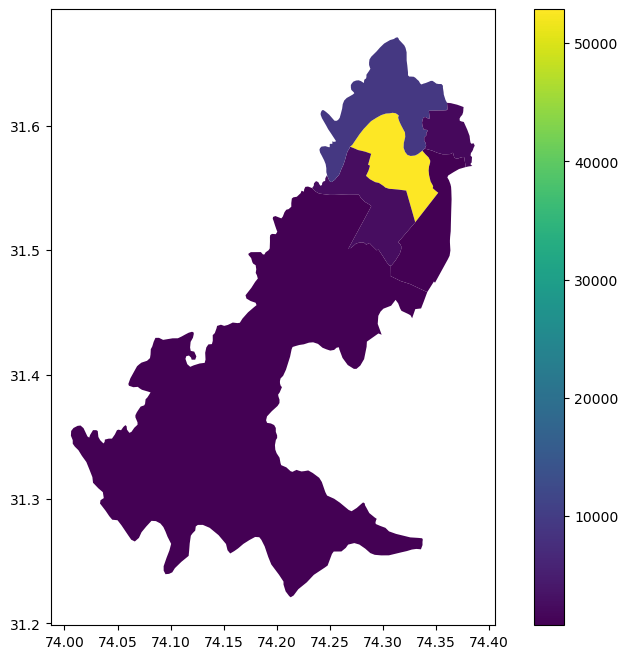

In [7]:
# merge the count of points per region with the GeoDataFrame containing the regions
gdf_merged = gdf.merge(points_per_region, on='NAME')

# create choropleth map
gdf_merged.plot(column='count', legend=True)

# set figure size
fig = plt.gcf()
fig.set_size_inches(10, 8) # adjust the values to your desired size
plt.show()


In [5]:
gdf_merged

,LAYER,NAME,PERIMETER,ENCLOSED_A,TOWN,geometry,count
0,Unknown Area Type,5,29.7 km,33.6 sq km,DATA GUNJ BAKHSH TOWN,"POLYGON ((74.26894 31.58317, 74.27092 31.58437...",52857
1,Unknown Area Type,7,38.4 km,36.5 sq km,SAMANABAD TOWN,"POLYGON ((74.24767 31.55940, 74.24767 31.55940...",2539
2,Unknown Area Type,8,179 km,479 sq km,IQBAL TOWN,"POLYGON ((74.33574 31.25960, 74.33138 31.25990...",833
3,Unknown Area Type,6,35.4 km,37.7 sq km,GULBERG TOWN,"POLYGON ((74.30667 31.47936, 74.30681 31.48735...",762
4,Unknown Area Type,1,51.9 km,57.3 sq km,RAVI TOWN,"POLYGON ((74.33930 31.58151, 74.33705 31.57992...",9288
5,Unknown Area Type,2,20.2 km,16 sq km,SHALIMAR TOWN,"POLYGON ((74.33930 31.58151, 74.34066 31.58399...",1782


C:\Users\drfak\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\drfak\AppData\Local\Temp\ipykernel_11424\2161543211.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["Geographic Coordinate System",DATUM["WGS84 ...

  gdf_points_in_regions = gpd.sjoin(gdf_points, lahore, op='within')


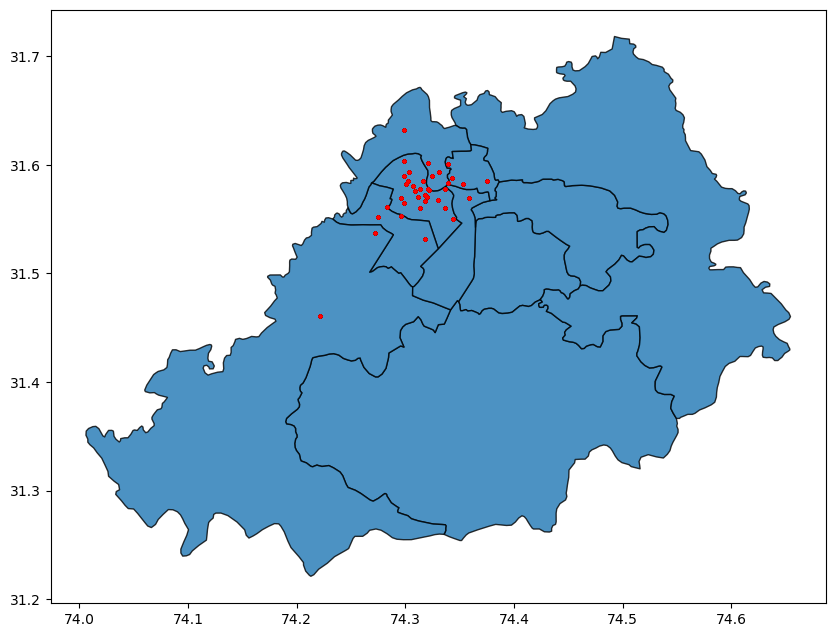

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# load csv file
csv_file = 'ABCD.csv'
df = pd.read_csv(csv_file)

# load shapefile
lahore = gpd.read_file(r"C:\Users\drfak\Toolkit\Lahore towns uc and vill\LH_TOWNS-2006_GEO_AREAS.shp")

# create a GeoDataFrame from pandas DataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Spatial join the points with the polygons
gdf_points_in_regions = gpd.sjoin(gdf_points, lahore, op='within')

# Plot the polygons and the points
fig, ax = plt.subplots(figsize=(10,10))
lahore.plot(ax=ax, alpha=0.8, edgecolor='black')
gdf_points_in_regions.plot(ax=ax, color='red', markersize=2)

plt.show()


In [5]:
gdf_points_in_regions

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,geometry,index_right,LAYER,NAME,PERIMETER,ENCLOSED_A,TOWN
1,5/1/2011,20,2,pain,bleeding,RTA,Gulshan-e-Ravi,31.55217,74.27529,POINT (74.27529 31.55217),1,Unknown Area Type,7,38.4 km,36.5 sq km,SAMANABAD TOWN
6,5/1/2011,45,1,bleeding,pain,RTA,Gulshan-e-Ravi,31.55217,74.27529,POINT (74.27529 31.55217),1,Unknown Area Type,7,38.4 km,36.5 sq km,SAMANABAD TOWN
29,5/1/2011,45,2,headache,bodyaches,Gastroenteritis,"ICCHRA,LAHORE",31.53130,74.31830,POINT (74.31830 31.53130),1,Unknown Area Type,7,38.4 km,36.5 sq km,SAMANABAD TOWN
30,5/1/2011,26,2,pain,irritation,FB ear,Gulshan-e-Ravi,31.55217,74.27529,POINT (74.27529 31.55217),1,Unknown Area Type,7,38.4 km,36.5 sq km,SAMANABAD TOWN
31,5/1/2011,65,2,fever,anxiety,SOB,Gulshan-e-Ravi,31.55217,74.27529,POINT (74.27529 31.55217),1,Unknown Area Type,7,38.4 km,36.5 sq km,SAMANABAD TOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73531,8/30/2011,24,2,vomiting,tinnitus,bodyaches,"MUGHALPURA,LAHORE",31.56900,74.35860,POINT (74.35860 31.56900),7,Unknown Area Type,6,35.4 km,37.7 sq km,GULBERG TOWN
73568,8/30/2011,25,2,Fever,body pains,headache,"MUGHALPURA,LAHORE",31.56900,74.35860,POINT (74.35860 31.56900),7,Unknown Area Type,6,35.4 km,37.7 sq km,GULBERG TOWN
74373,8/31/2011,26,2,fever,abdominal pain,Itch,"MUGHALPURA,LAHORE",31.56900,74.35860,POINT (74.35860 31.56900),7,Unknown Area Type,6,35.4 km,37.7 sq km,GULBERG TOWN
74657,8/31/2011,65,1,Epigastric pain,headache,headache,"MUGHALPURA,LAHORE",31.56900,74.35860,POINT (74.35860 31.56900),7,Unknown Area Type,6,35.4 km,37.7 sq km,GULBERG TOWN


C:\Users\drfak\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\drfak\AppData\Local\Temp\ipykernel_3472\3884467049.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["Geographic Coordinate System",DATUM["WGS84 ...

  gdf_points_in_regions = gpd.sjoin(gdf_points, lahore, op='within')


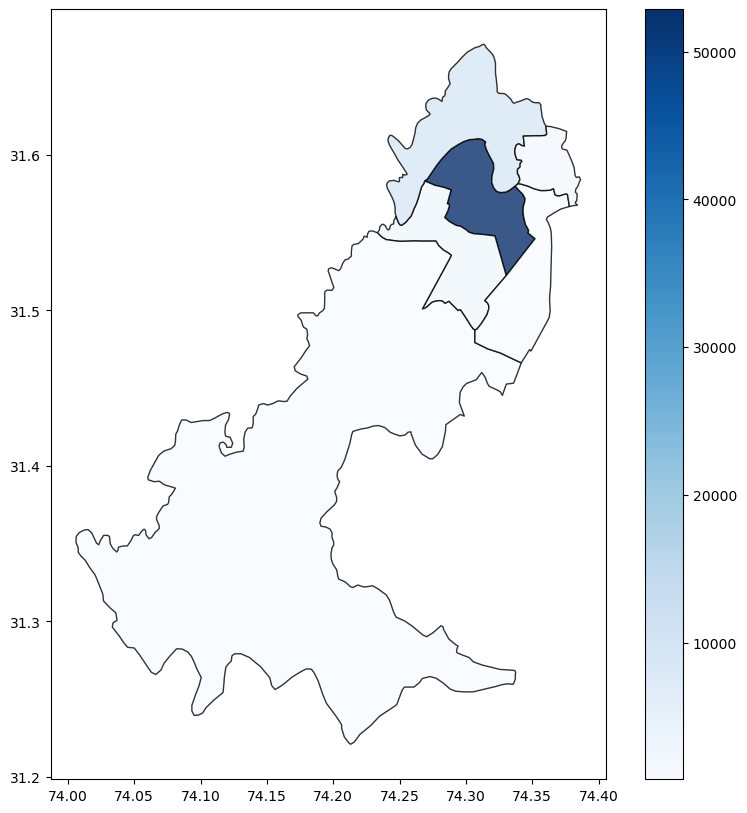

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# load csv file
csv_file = 'ABCD.csv'
df = pd.read_csv(csv_file)

# load shapefile
lahore = gpd.read_file(r"C:\Users\drfak\Toolkit\Lahore towns uc and vill\LH_TOWNS-2006_GEO_AREAS.shp")

# create a GeoDataFrame from pandas DataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Spatial join the points with the polygons
gdf_points_in_regions = gpd.sjoin(gdf_points, lahore, op='within')

# Group the points by region and count the number of points in each region
counts = gdf_points_in_regions.groupby('TOWN').size().reset_index(name='count')

# Merge the counts back into the polygons GeoDataFrame
lahore_counts = lahore.merge(counts, on='TOWN', how='left')

# Plot the polygons and the points, with labels showing the region name and point count
fig, ax = plt.subplots(figsize=(10,10))
lahore_counts.plot(ax=ax, column='count', cmap='Blues', alpha=0.8, edgecolor='black', legend=True)

plt.show()


C:\Users\drfak\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\drfak\AppData\Local\Temp\ipykernel_14640\3258595117.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["Geographic Coordinate System",DATUM["WGS84 ...

  gdf_points_in_regions = gpd.sjoin(gdf_points, lahore, op='within')


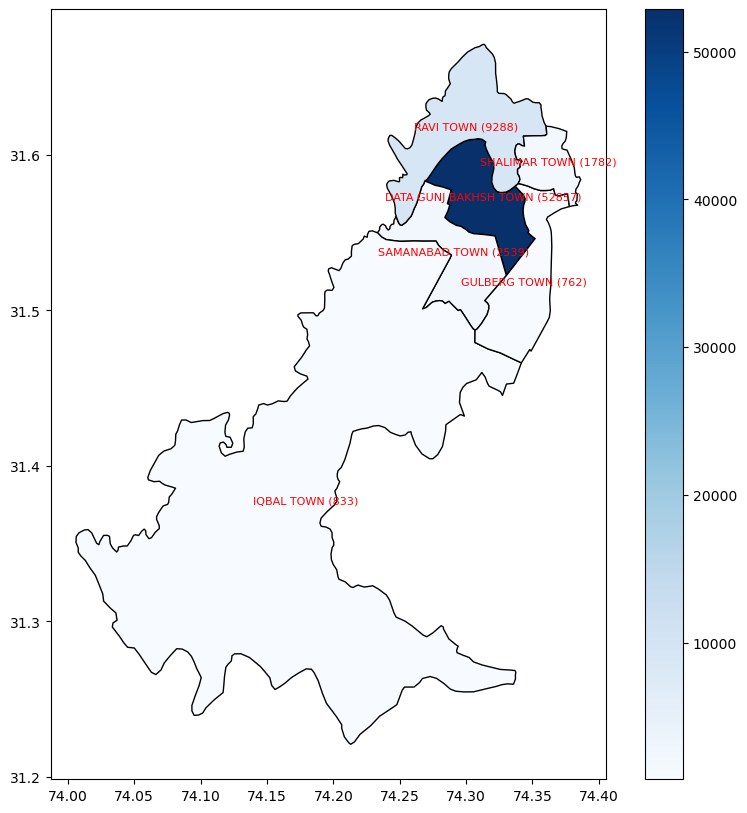

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# load csv file
csv_file = 'ABCD.csv'
df = pd.read_csv(csv_file)

# load shapefile
lahore = gpd.read_file(r"C:\Users\drfak\Toolkit\Lahore towns uc and vill\LH_TOWNS-2006_GEO_AREAS.shp")

# create a GeoDataFrame from pandas DataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Spatial join the points with the polygons
gdf_points_in_regions = gpd.sjoin(gdf_points, lahore, op='within')

# Get count of points in each region
points_in_regions = gdf_points_in_regions.groupby('TOWN').size().reset_index(name='Total Points')

# Merge with the original Lahore GeoDataFrame
lahore_points = pd.merge(lahore, points_in_regions, on='TOWN')

# Plot the polygons and the points
fig, ax = plt.subplots(figsize=(10,10))
lahore_points.plot(ax=ax, column='Total Points', cmap='Blues', edgecolor='black', legend=True)

# Label each region with its name and the total number of points it contains
for idx, row in lahore_points.iterrows():
    plt.annotate(text=f"{row['TOWN']} ({row['Total Points']})", xy=row['geometry'].centroid.coords[0], 
                 horizontalalignment='center', color='red', fontsize=8)


plt.show()


In [8]:
gdf_points_in_regions = gdf_points_in_regions[(gdf_points_in_regions["TOWN"] == "IQBAL TOWN") & gdf_points_in_regions["Sex"] == 2]
gdf_points_in_regions

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,geometry,index_right,LAYER,NAME,PERIMETER,ENCLOSED_A,TOWN


In [86]:
# convert date column to datetime format
gdf_points_in_regions['Date'] = pd.to_datetime(gdf_points_in_regions['Date'])

# group by date and count number of occurrences
date_counts = gdf_points_in_regions.groupby('Date').size().reset_index(name='Number of Patients')
date_counts

,Date,Number of Patients
0,2011-05-01,11
1,2011-05-02,13
2,2011-05-03,4
3,2011-05-04,3
4,2011-05-05,7
...,...,...
113,2011-08-27,11
114,2011-08-28,25
115,2011-08-29,6
116,2011-08-30,12


In [87]:
date_counts.to_csv("Iqbal.csv")

C:\Users\drfak\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\drfak\AppData\Local\Temp\ipykernel_14828\3203792898.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["Geographic Coordinate System",DATUM["WGS84 ...

  gdf_points_in_regions = gpd.sjoin(gdf_points, gdf, op='within')


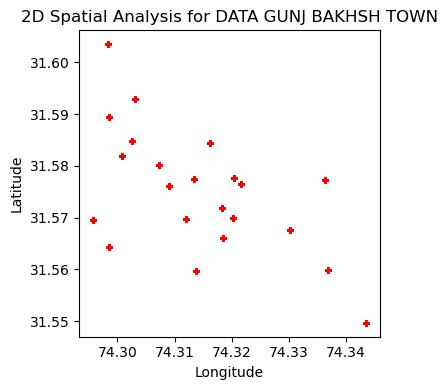

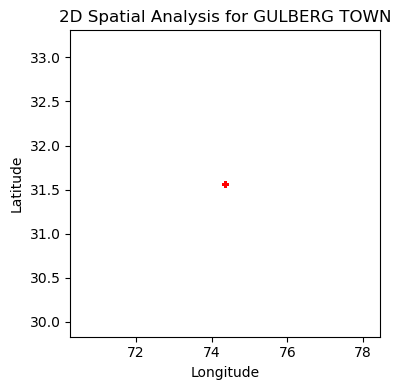

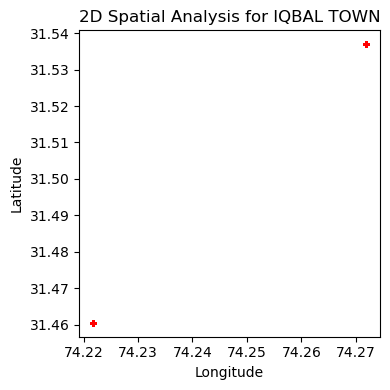

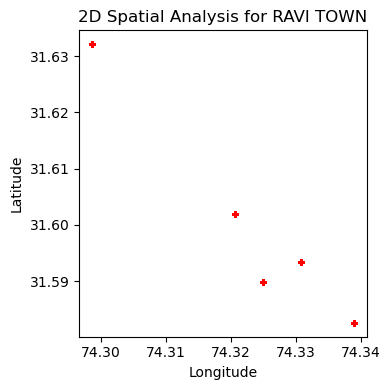

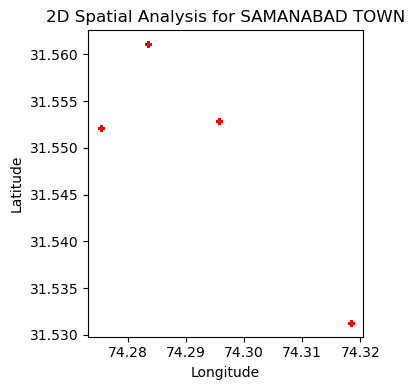

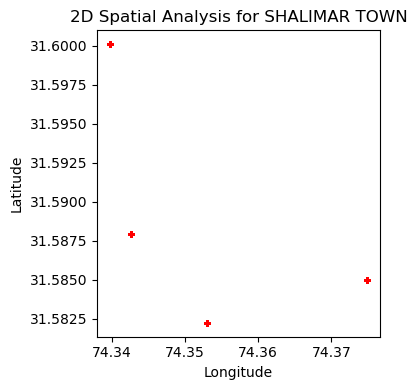

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load CSV file
csv_file = 'ABCD.csv'
df = pd.read_csv(csv_file)

# Load shapefile
shapefile_path = r"C:\Users\drfak\Toolkit\Lahore towns uc and vill\LH_TOWNS-2006_GEO_AREAS.shp"
gdf = gpd.read_file(shapefile_path)

# Create a GeoDataFrame from the pandas DataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Spatial join the points with the polygons
gdf_points_in_regions = gpd.sjoin(gdf_points, gdf, op='within')

# Perform analysis for each region
for region_name, region_data in gdf_points_in_regions.groupby('TOWN'):
    # Create a separate figure for each region
    fig, ax = plt.subplots(figsize=(4, 4))

    # Plot each point within the current region separately
    for index, point in region_data.iterrows():
        ax.plot(point['Longitude'], point['Latitude'], marker='+', color='red', markersize=5)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'2D Spatial Analysis for {region_name}')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()